In [1]:
import pandas as pd
import numpay as np
train_data_path = "E:/page ds/pages/ts_mixer/TS-Mixer/covTrain.csv" 
forecast_data_path = "E:/page ds/pages/ts_mixer/TS-Mixer/covForecast.csv" 

data_train = pd.read_csv(train_data_path)
forecast_data = pd.read_csv(forecast_data_path)


In [2]:
mi = data_train['index'].max()
forecast_data['index'] = [i + mi for i in forecast_data['index']]

forecast_data.set_index('index', inplace=True)
data_train.set_index('index', inplace=True)

Mamy tutaj komfortowa sytuację ponieważ od razu posiadamy dane podzielone na zbiór uczący i testowy. W drugiej kolejności należy dopisać dane odnośnie prognoz modelami zbudowanymi już w Pythonie tj. Prophet oraz LSTM.

In [3]:
#poniżej kody, które zapisywały dane do plików wyjsciowych: muszę teraz z nich wczytać odpowiednie dane
#pd.DataFrame(testPredict).to_csv("E:/page ds/pages/ts_mixer/TS-Mixer/CovidLSTMtest.csv")
#pd.DataFrame(trainPredict).to_csv("E:/page ds/pages/ts_mixer/TS-Mixer/CovidLSTMtrain.csv")  # tutaj brakuje pierwszego elementu, należy go uzupełnić
#CovidProphet.to_csv("E:/page ds/pages/ts_mixer/TS-Mixer/CovidProphet.csv") 

CovidLSTMtest = pd.read_csv("E:/page ds/pages/ts_mixer/TS-Mixer/CovidLSTMtest.csv")
CovidLSTMtrain = pd.read_csv("E:/page ds/pages/ts_mixer/TS-Mixer/CovidLSTMtrain.csv")
CovidProphet = pd.read_csv("E:/page ds/pages/ts_mixer/TS-Mixer/CovidProphet.csv")

CovidLSTMtest.columns = ['index', 'LSTM_hat']
CovidLSTMtrain.columns = ['index', 'LSTM_hat']
# zwiększam jeszcze wartości indexu ponieważ brakuje pierwszego elementu z indexu, całość jest przesunięta o +1
CovidLSTMtrain['index'] = [i + 1 for i in CovidLSTMtrain['index']
CovidProphet.columns = ['index', 'Prophet_hat']

#wrzucam indexy
CovidProphet.set_index('index', inplace=True)
CovidLSTMtest.set_index('index', inplace=True)
CovidLSTMtrain.set_index('index', inplace=True)

import numpy as np
CovidLSTMtest.index = list(np.arange(713,727))

Uzupełniam o pozostałe kolumny z innymi modelami

In [34]:
data_train = data_train.join(CovidLSTMtrain)
#uzupełniam ostatnią wartość, której brakuje poprzez skopiowanie poprzedniej
data_train.at[712,'LSTM_hat'] = data_train.at[711,'LSTM_hat']
forecast_data = forecast_data.join(CovidLSTMtest)

KeyError: (712, 'LSTM_hat')

In [64]:
forecast_data

,przypadki,Arima_lag1,Arima_bc,Arima_auto,LSTM_hat
index,,,,,
713,1410,2034.274742,2241.412268,1964.068297,598.8797
714,1541,1673.768116,1578.484464,1703.532761,975.5389
715,1676,1676.835701,988.593956,1828.390892,1326.2167
716,1833,1384.564595,665.417703,1950.741362,1652.9352
717,335,456.915837,710.315523,2070.634537,1957.5258
718,278,579.536340,945.997682,2188.119768,2241.6536
719,2703,1635.080261,1346.599938,2303.245417,2506.8350
720,2424,1857.087225,1491.898336,2416.058874,2754.4534
721,2504,1461.896915,1348.069793,2526.606577,2985.7754


In [60]:
CovidProphet.index = list(np.arange(1,727))
data_train = data_train.join(CovidProphet)
forecast_data = forecast_data.join(CovidProphet)

In [71]:
data_train.isnull().sum()

przypadki      0
Arima_lag1     0
Arima_bc       0
Arima_auto     0
LSTM_hat       0
Prophet_hat    0
dtype: int64

In [73]:
forecast_data.isnull().sum()

przypadki      0
Arima_lag1     0
Arima_bc       0
Arima_auto     0
LSTM_hat       0
Prophet_hat    0
dtype: int64

Skoro mamy dane to przystępuję do głównej części przedstawienia tj zbudowanie miksera

In [ ]:
X = data_train[['Arima_lag1','Arima_bc', 'Arima_auto','LSTM_hat','Prophet_hat']]
y = data_train['przypadki']
X_forecast = forecast_data[['Arima_lag1','Arima_bc', 'Arima_auto','LSTM_hat','Prophet_hat']]
y_forecast = forecast_data['przypadki']



In [82]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X, y)

LinearRegression()

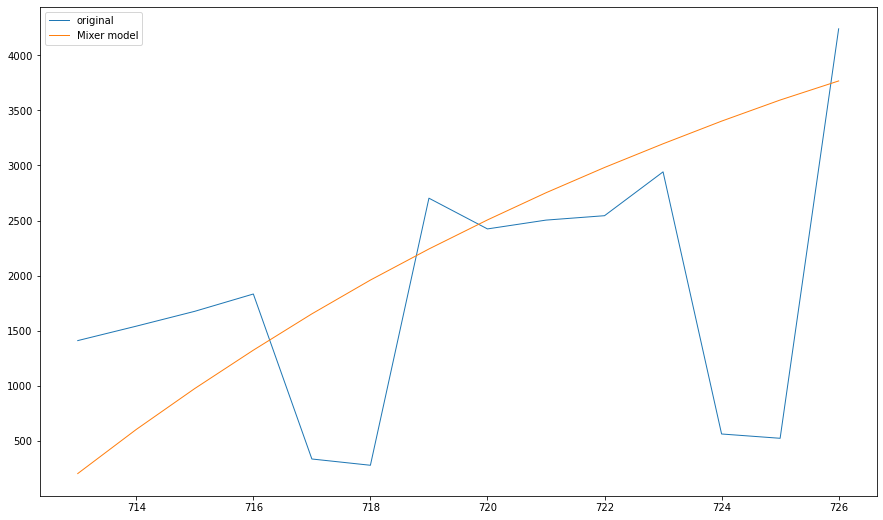

In [92]:
import matplotlib.pyplot as plt

predykcja = pd.DataFrame(model.predict(X_forecast))
predykcja.index = y_forecast.index

# plot baseline and predictions
plt.figure(figsize = (15,9))
plt.plot(y_forecast, linewidth=1)
plt.plot(predykcja, linewidth=1)
plt.legend(["original", "Mixer model"], loc=0, frameon=True)
#plt.savefig(r'E:\page ds\pages\ts_covid19\LSTM_test.png' , format="png", dpi=300)
plt.show()

